# COVID-19 cases worldwide

This notebook provides useful information about the coronavirus outbreak across the world.
Although it was written in a programming language (Python), please ignore the code if you're not familiar to it.

The data here displayed is taken from a source published by the Johns Hopkins University. You can see at the  original source here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data.

However, I transformed the data into a more useful source for the purposes of this work. You might find the new format at https://github.com/McSonk/covid19/tree/master/data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from cv19.utils.plots import plot_country_cases, plot_top5, plot_country_changes, plot_country_deaths, plot_death_changes
from cv19.utils.manipulation import calc_changes
%matplotlib inline
# Read data from csv
data = pd.read_csv('data/conf_per_day.csv', index_col='Date')
deaths = pd.read_csv('data/deaths_per_day.csv', index_col='Date')
# Update Mexican data
data['Mexico'] = data['Mexico'].shift(-1)
data.loc['2020-03-27', 'Mexico'] = 717
data['Mexico'] = data['Mexico'].astype('int64')

deaths['Mexico'] = deaths['Mexico'].shift(-1)
deaths.loc['2020-03-22', 'Mexico'] = 2
deaths.loc['2020-03-23', 'Mexico'] = 4
deaths.loc['2020-03-27', 'Mexico'] = 12
deaths['Mexico'] = deaths['Mexico'].astype('int64')
# Get the totals worldwide
data['the world'] = data.sum(axis=1)
deaths['the world'] = deaths.sum(axis=1)
# Calc the changes intradays
changes = calc_changes(data)
death_changes = calc_changes(deaths)

## Part 1: What are we talking about?

The further analysis presents the coronavirus confirmed cases we have information about across the several days the illness have been in the world.

In [2]:
print("Number of infected countries: %d" % data.columns.size)

Number of infected countries: 177


In [3]:
print("Top 10 countries by confirmed cases")
print()
print(data.iloc[-1].sort_values(ascending=False).apply(lambda x: '{:,}'.format(x)).head(11))
print()
print("--- Updated the March 21th, 2020")
print("Source: Johns Hopkins University")

Top 10 countries by confirmed cases

the world         593,423
US                101,657
Italy              86,498
China              81,897
Spain              65,719
Germany            50,871
France             33,402
Iran               32,332
United Kingdom     14,745
Switzerland        12,928
Korea, South        9,332
Name: 2020-03-27, dtype: object

--- Updated the March 21th, 2020
Source: Johns Hopkins University


In [4]:
print("Top 10 countries by confirmed demises")
print()
print(deaths.iloc[-1].sort_values(ascending=False).apply(lambda x: '{:,}'.format(x)).head(11))
print()
print("--- Updated the March 21th, 2020")
print("Source: Johns Hopkins University")

deaths[['Spain', 'Italy']].iloc[-1].sum()

Top 10 countries by confirmed demises

the world         27,202
Italy              9,134
Spain              5,138
China              3,296
Iran               2,378
France             1,997
US                 1,581
United Kingdom       761
Netherlands          547
Germany              342
Belgium              289
Name: 2020-03-27, dtype: object

--- Updated the March 21th, 2020
Source: Johns Hopkins University


14272

### Visual representation

The followin plot shows the evolution of the confirmed cases in the first 5 nations with most cases detected

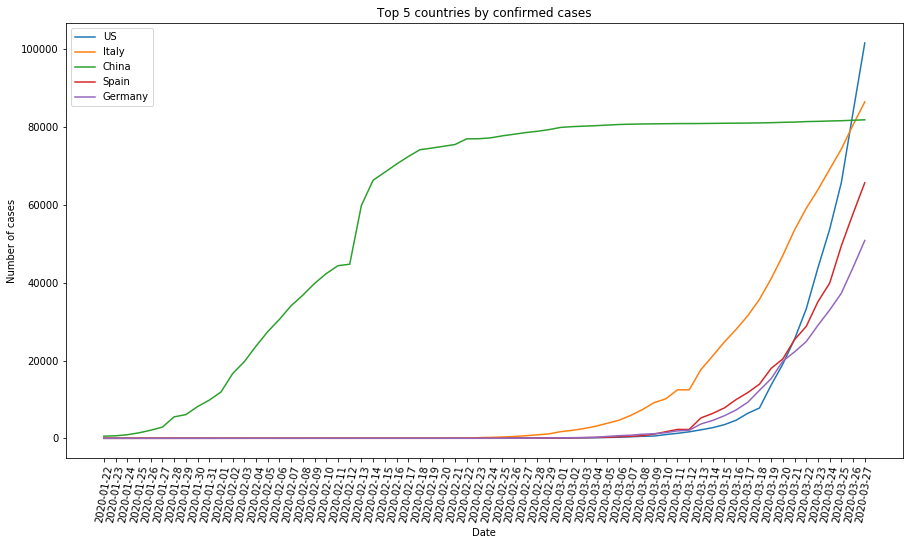

In [5]:
plot_top5(data)

This graph shows the 5 countries with more deaths

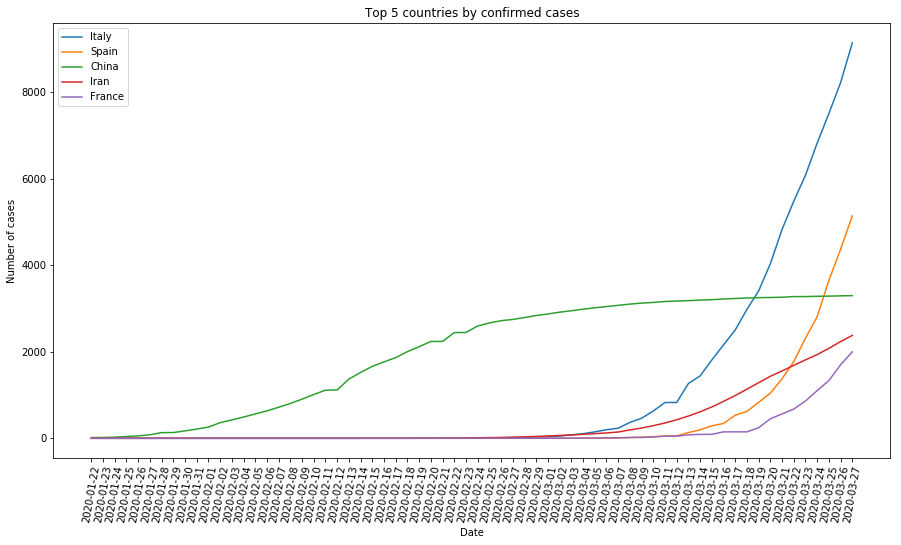

In [6]:
plot_top5(deaths)

## Part 2: Global overview

In the next section we'll display information about the crisis in all over the world

First case for the world detected on 2020-01-22. 65 days have passed since then
Currently having 593,423 confirmed cases
Max number of new cases: 63,722.0


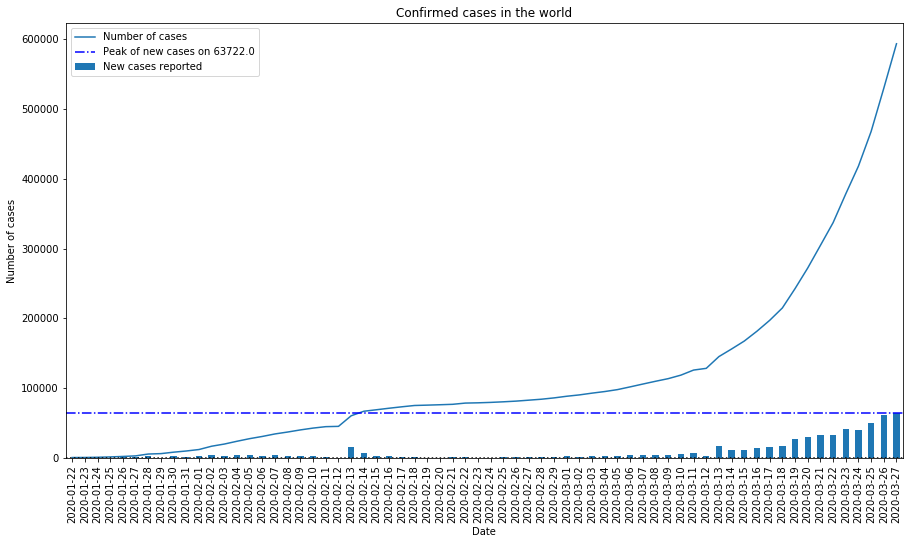

In [7]:
plot_country_cases(data, 'the world', changes=changes)

First case for the world detected on 2020-01-22. 65 days have passed since then
Currently having 27,202 confirmed cases
Highest number of daily deaths: 3,230.0


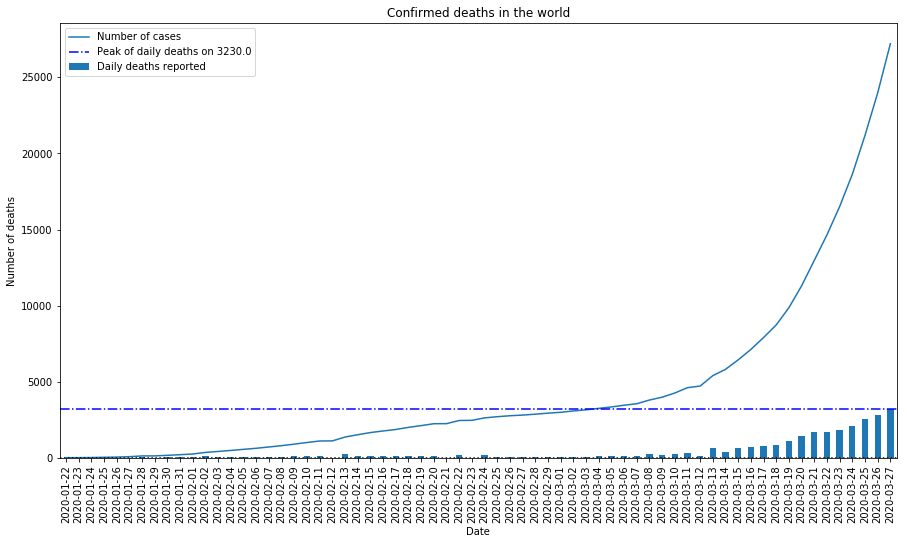

In [8]:
plot_country_deaths(deaths, 'the world', changes=death_changes)

## Part 3: Countries overview

The following sections depicts graphs of data available of confirmed cases per country.

### Mexico

Primer caso en Mexico detectado el 2020-02-27. Han pasado 29 días desde entonces
Actualmente hay 717 casos confirmados
Máximo número de nuevos casos: 132.0


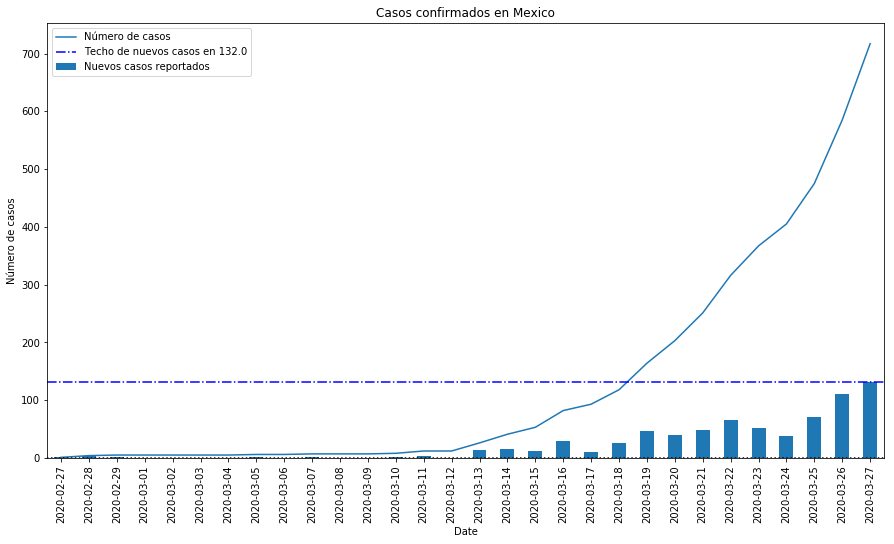

Date
2020-03-23    367
2020-03-24    405
2020-03-25    475
2020-03-26    585
2020-03-27    717
Name: Mexico, dtype: int64
Date
2020-03-23    16.139241
2020-03-24    10.354223
2020-03-25    17.283951
2020-03-26    23.157895
2020-03-27    22.564103
Name: Mexico, dtype: float64


In [9]:
plot_country_cases(data, 'Mexico', changes=changes, language='es')
print(data['Mexico'].tail())
print(data['Mexico'].pct_change().tail() * 100)

Primer caso en Mexico detectado el 2020-03-18. Han pasado 9 días desde entonces
Actualmente hay 12 casos confirmados
Máximo número de muertes reportadas: 4.0


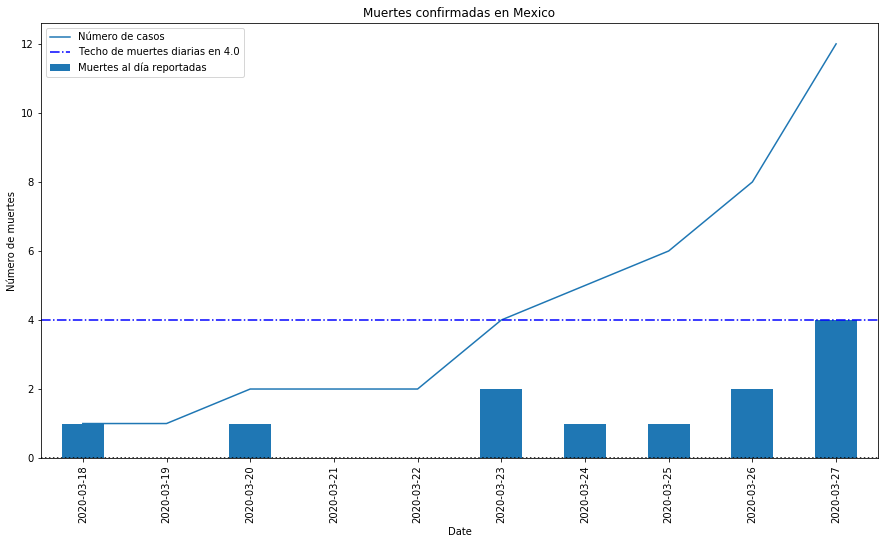

In [10]:
plot_country_deaths(deaths, 'Mexico', changes=death_changes, language='es')

### Italy

Primer caso en Italy detectado el 2020-01-31. Han pasado 56 días desde entonces
Actualmente hay 86,498 casos confirmados
Máximo número de nuevos casos: 6,557.0


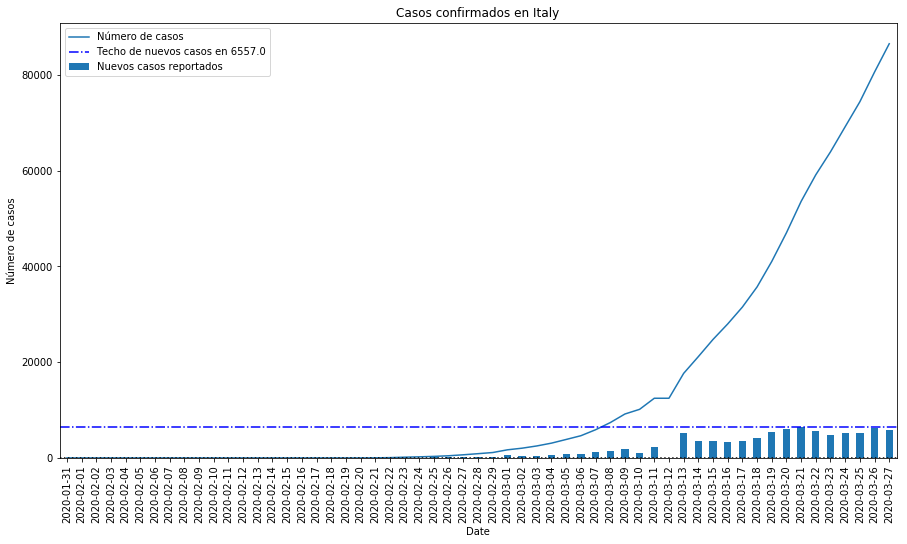

In [11]:
plot_country_cases(data, 'Italy',  changes=changes, language='es') #'2020-03-10'

Primer caso en Italy detectado el 2020-02-21. Han pasado 35 días desde entonces
Actualmente hay 9,134 casos confirmados
Máximo número de muertes reportadas: 919.0


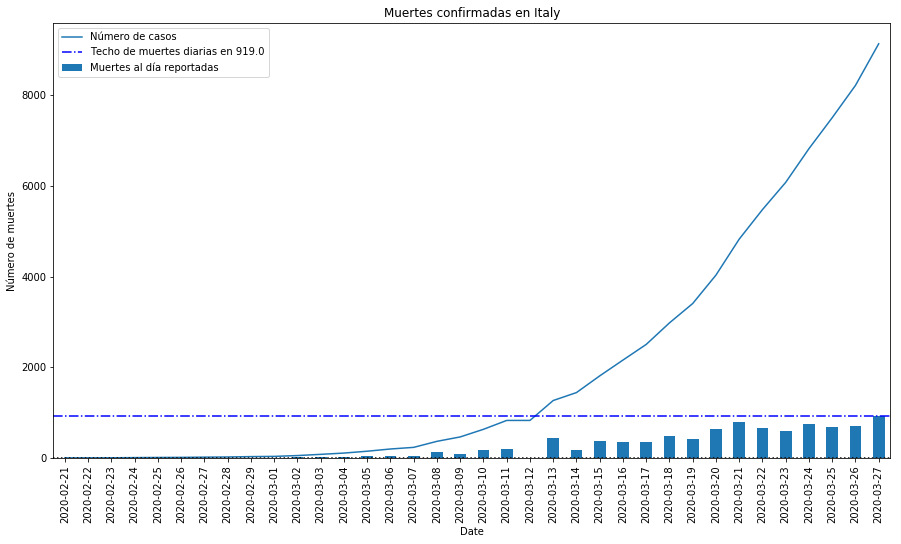

In [13]:
plot_country_deaths(deaths, 'Italy', language='es', changes=death_changes)

First case for Italy detected on 2020-02-21. 29 days have passed since then
Currently having 793.0 confirmed cases
Max number of deaths: 793.0


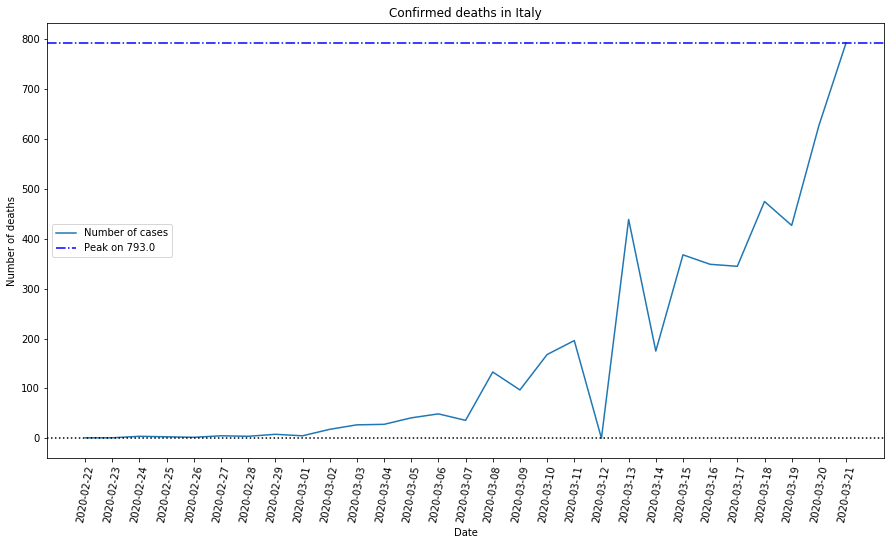

In [16]:
plot_death_changes(death_changes, 'Italy')

In [43]:
death_changes['Spain']

Date
2020-01-22      0.0
2020-01-23      0.0
2020-01-24      0.0
2020-01-25      0.0
2020-01-26      0.0
2020-01-27      0.0
2020-01-28      0.0
2020-01-29      0.0
2020-01-30      0.0
2020-01-31      0.0
2020-02-01      0.0
2020-02-02      0.0
2020-02-03      0.0
2020-02-04      0.0
2020-02-05      0.0
2020-02-06      0.0
2020-02-07      0.0
2020-02-08      0.0
2020-02-09      0.0
2020-02-10      0.0
2020-02-11      0.0
2020-02-12      0.0
2020-02-13      0.0
2020-02-14      0.0
2020-02-15      0.0
2020-02-16      0.0
2020-02-17      0.0
2020-02-18      0.0
2020-02-19      0.0
2020-02-20      0.0
2020-02-21      0.0
2020-02-22      0.0
2020-02-23      0.0
2020-02-24      0.0
2020-02-25      0.0
2020-02-26      0.0
2020-02-27      0.0
2020-02-28      0.0
2020-02-29      0.0
2020-03-01      0.0
2020-03-02      0.0
2020-03-03      1.0
2020-03-04      1.0
2020-03-05      1.0
2020-03-06      2.0
2020-03-07      5.0
2020-03-08      7.0
2020-03-09     11.0
2020-03-10      7.0
2020-03-11     

### China

Primer caso en China detectado el 2020-01-22. Han pasado 59 días desde entonces
Cuarentena iniciada en 2020-01-25
Actualmente hay 81,305.0 casos confirmados


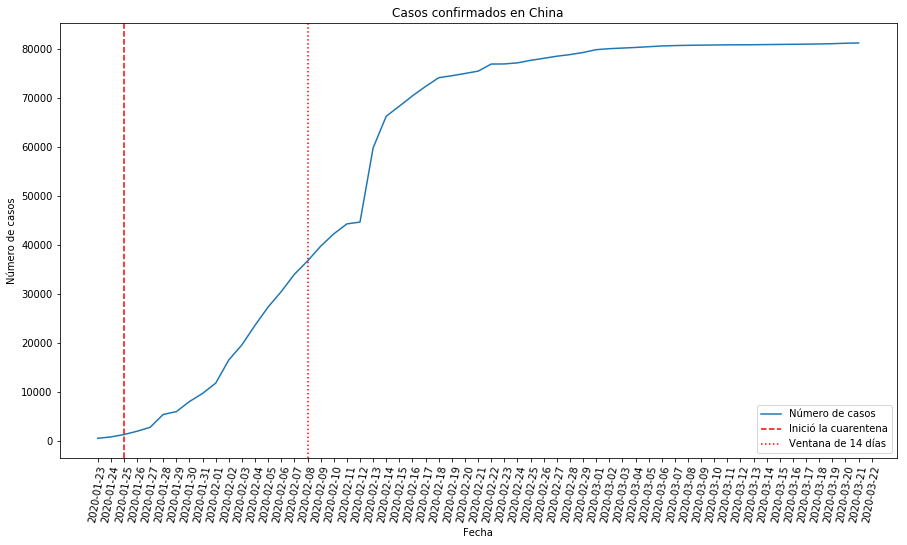

In [38]:
plot_country_cases(data, 'China', '2020-01-25', language='es')

First case for China detected on 2020-01-23. 58 days have passed since then
Lockdown started on 2020-01-25
Currently having 55.0 confirmed cases
Max number of new cases: 15136.0


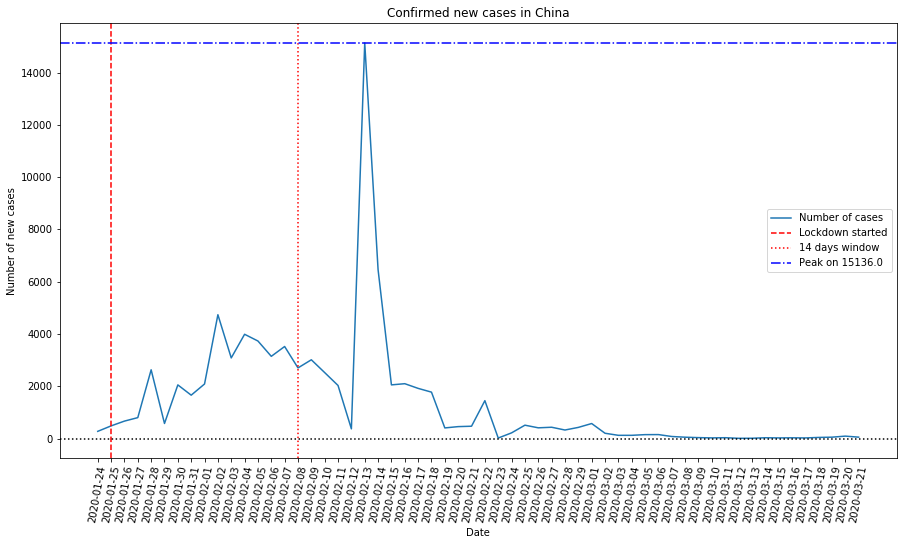

In [18]:
plot_country_changes(changes, 'China', '2020-01-25')

First case for China detected on 2020-01-22. 59 days have passed since then
Currently having 3,259 confirmed cases


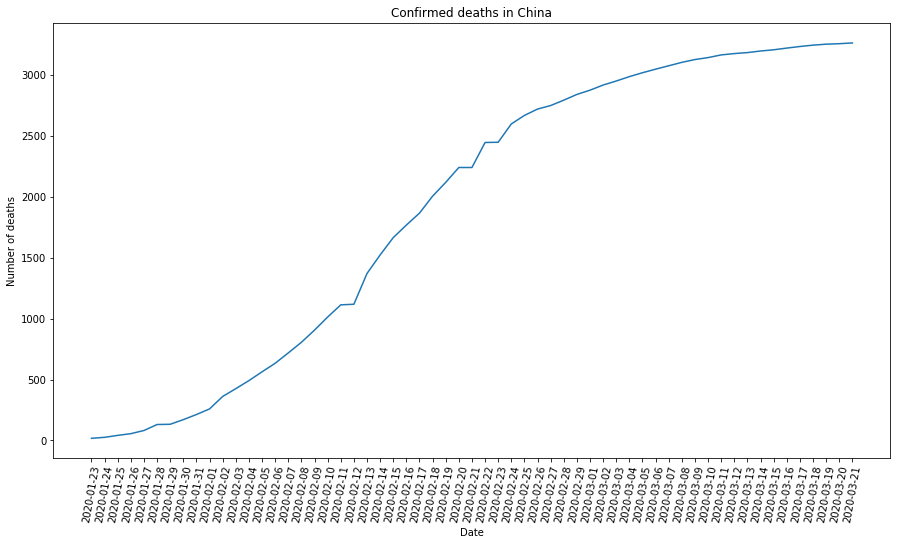

In [19]:
plot_country_deaths(deaths, 'China')

### South Korea

South Korea is a really special case. Although is one of the 5 nations with most confirmed cases, it also has a really low mortality rate. The high quantity of confirmed cases is atributed to the openess of the government, and the fact they're capable of doing 10,000 tests per day.

First case for Korea, South detected on 2020-01-22. 59 days have passed since then
Currently having 8,799.0 confirmed cases


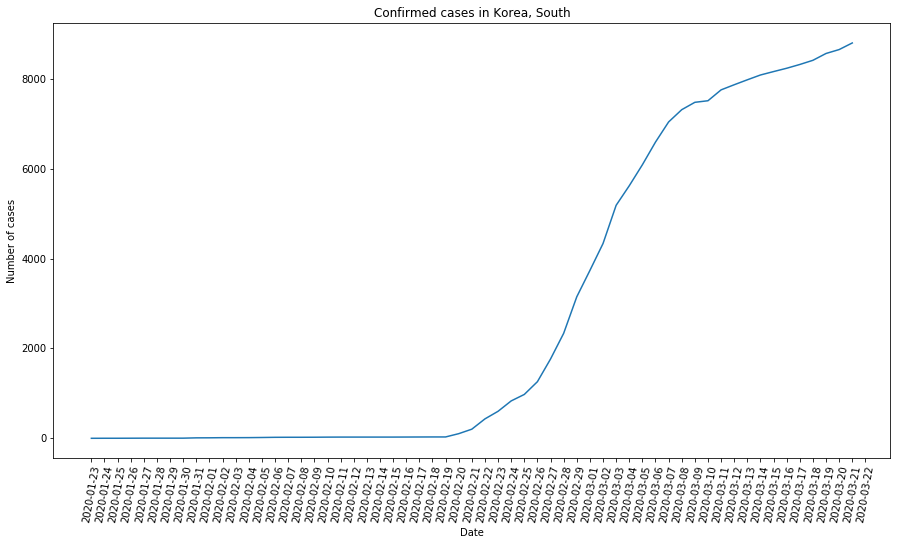

In [20]:
plot_country_cases(data, 'Korea, South')

First case for Korea, South detected on 2020-02-20. 30 days have passed since then
Currently having 102 confirmed cases


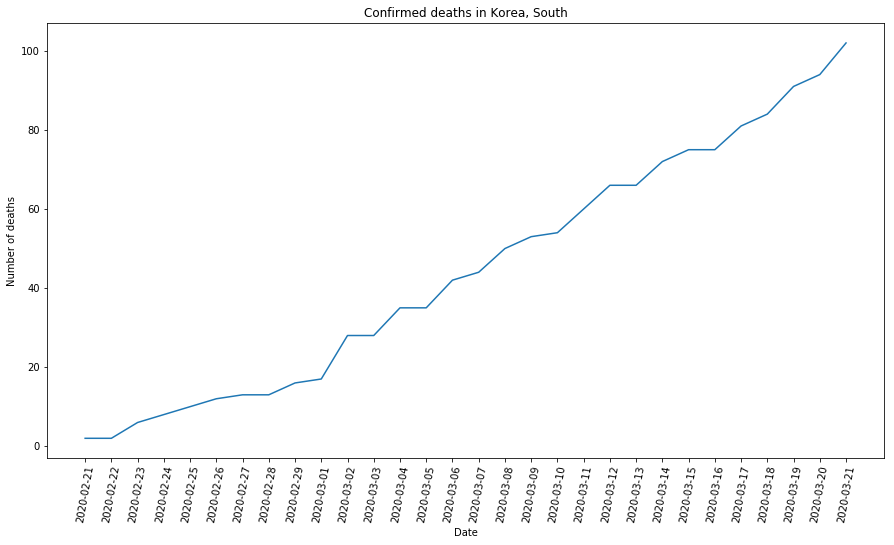

In [21]:
plot_country_deaths(deaths, 'Korea, South')

First case for Korea, South detected on 2020-01-24. 57 days have passed since then
Currently having 147.0 confirmed cases
Max number of new cases: 851.0


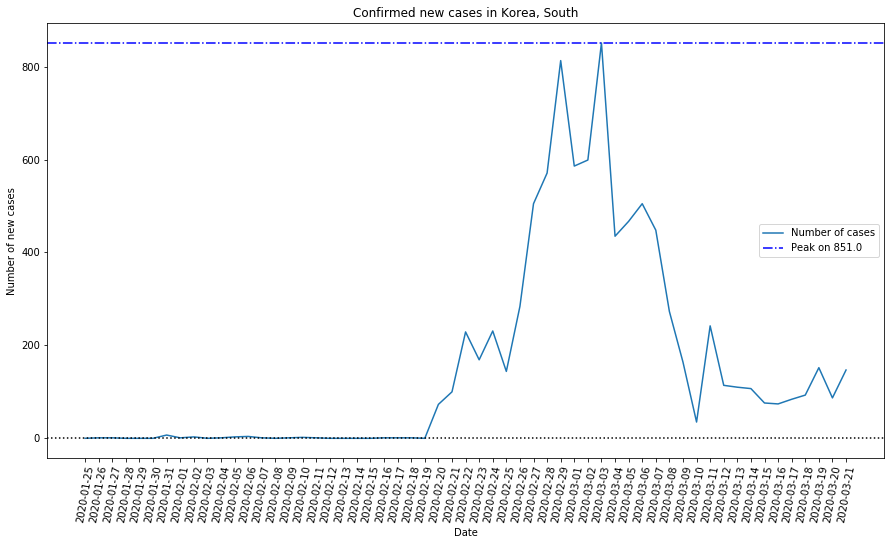

In [22]:
plot_country_changes(changes, 'Korea, South')

First case for Korea, South detected on 2020-02-20. 30 days have passed since then
Currently having 8.0 confirmed cases
Max number of deaths: 11.0


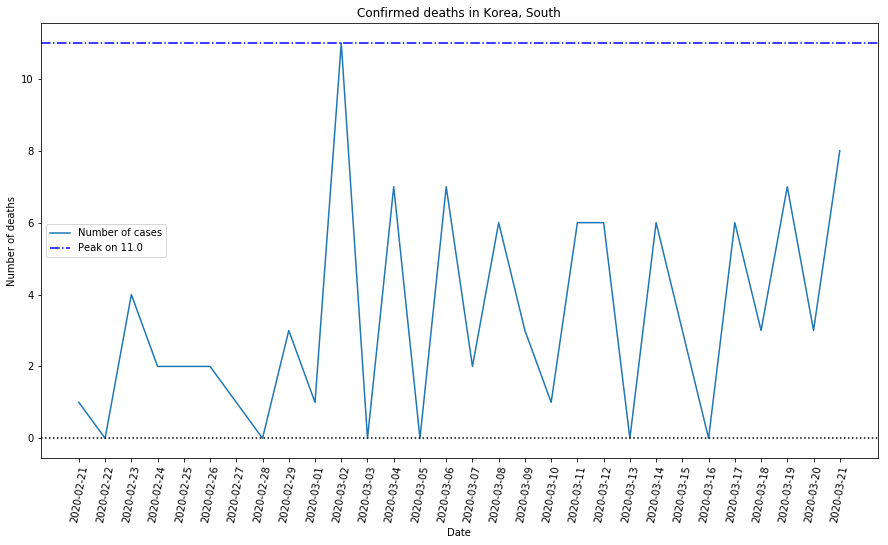

In [23]:
plot_death_changes(death_changes, 'Korea, South')

### Chile

First case for Chile detected on 2020-03-03. 18 days have passed since then
Currently having 537.0 confirmed cases


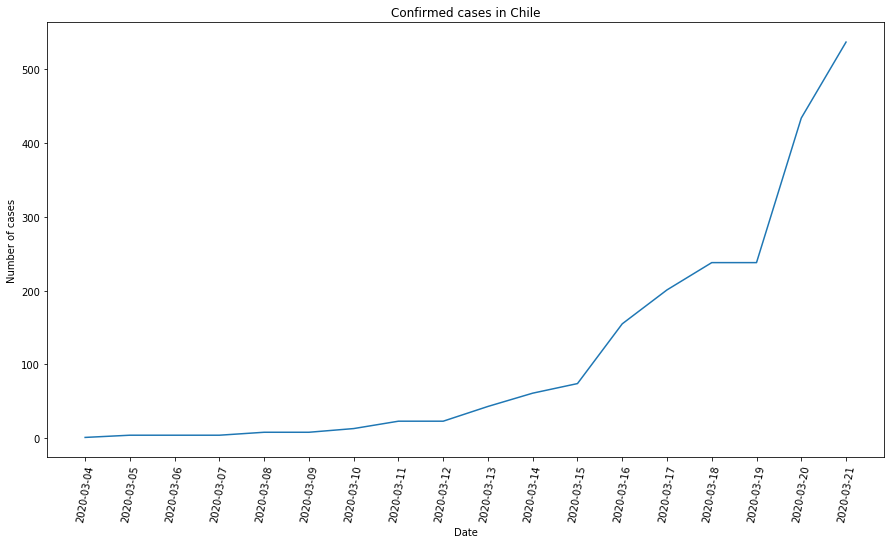

In [24]:
plot_country_cases(data, 'Chile')

First case for Chile detected on 2020-03-03. 18 days have passed since then
Currently having 103.0 confirmed cases
Max number of new cases: 196.0


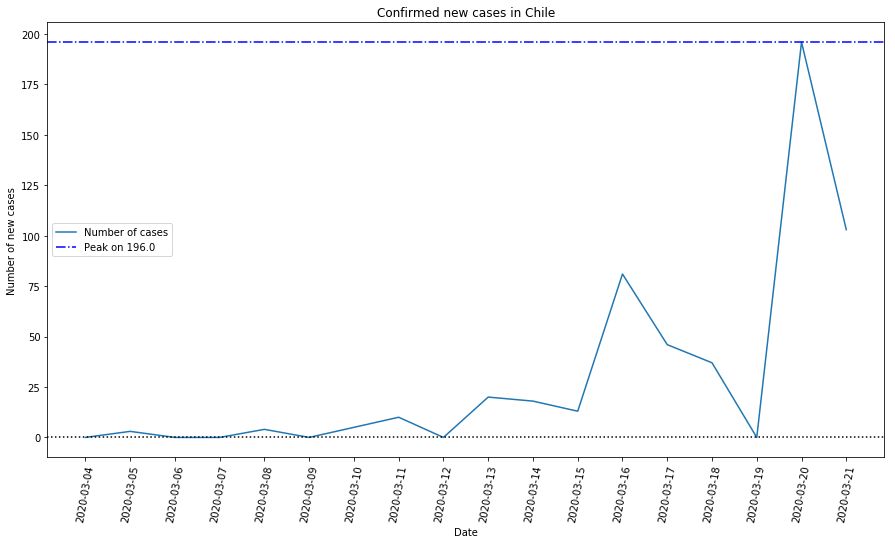

In [25]:
plot_country_changes(changes, 'Chile')

### Spain

First case for Spain detected on 2020-02-01. 49 days have passed since then
Currently having 25,374.0 confirmed cases


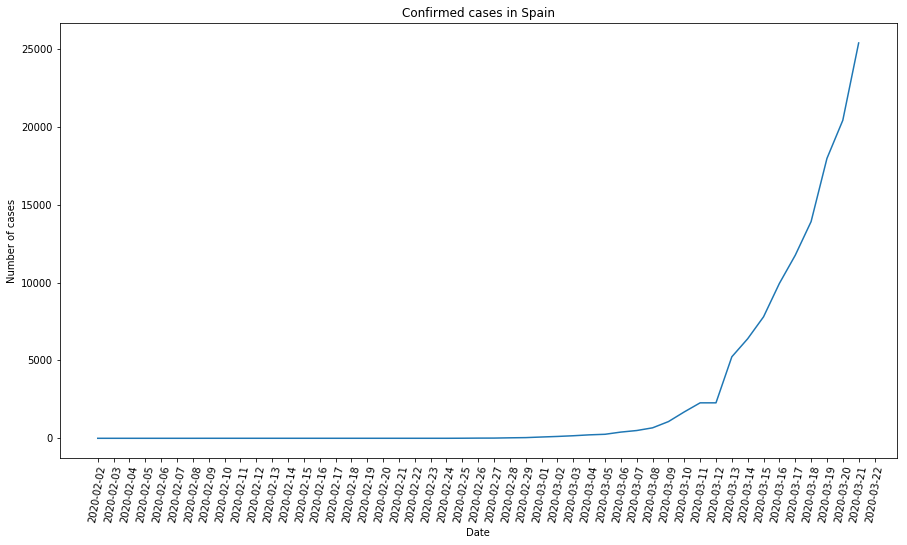

In [26]:
plot_country_cases(data, 'Spain')

Primer caso en Spain detectado el 2020-03-03. Han pasado 23 días desde entonces
Actualmente hay 4,365 casos confirmados
Máximo número de muertes reportadas: 839.0


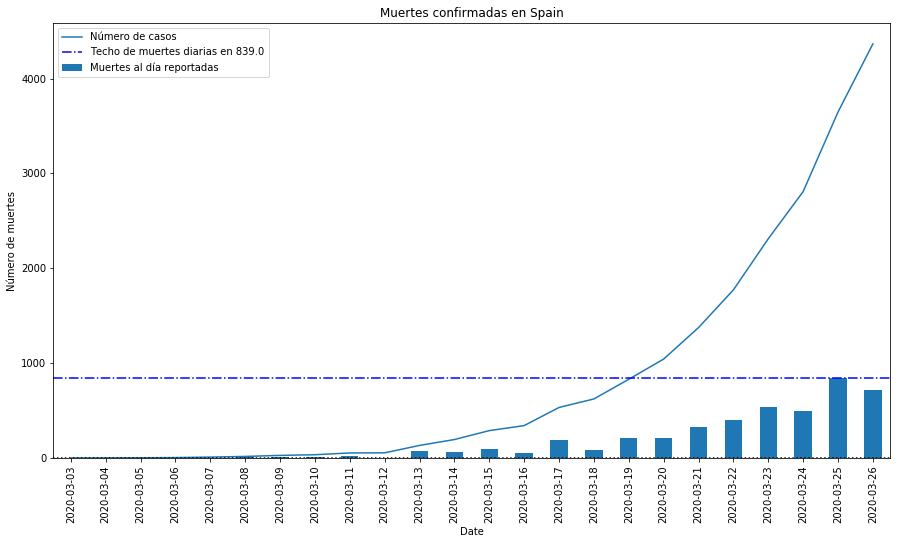

In [16]:
plot_country_deaths(deaths, 'Spain', changes=death_changes, language='es')

First case for Spain detected on 2020-02-01. 49 days have passed since then
Currently having 4,964.0 confirmed cases
Max number of new cases: 4964.0


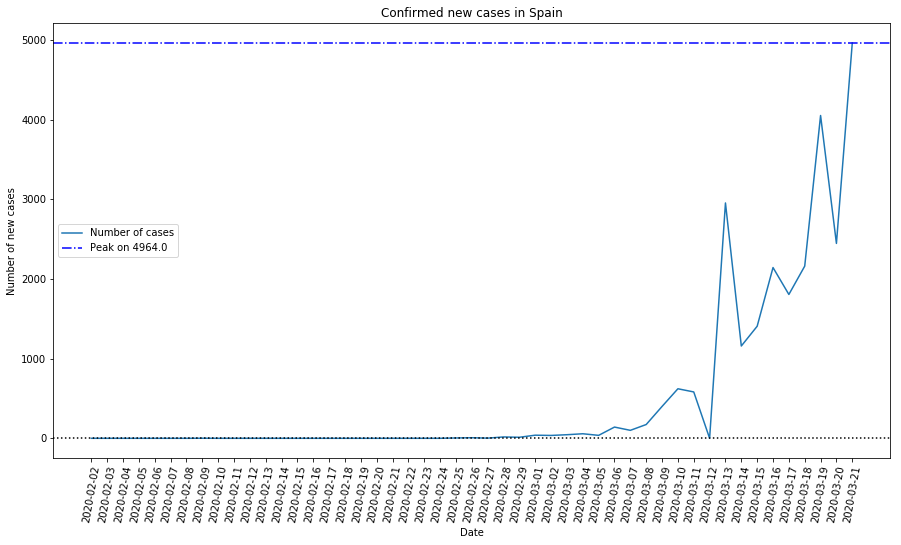

In [28]:
plot_country_changes(changes, 'Spain')

Primer caso en Spain detectado el 2020-03-03. Han pasado 23 días desde entonces
Actualmente hay 718.0 casos confirmados
Máximo número de muertes reportadas: 839.0


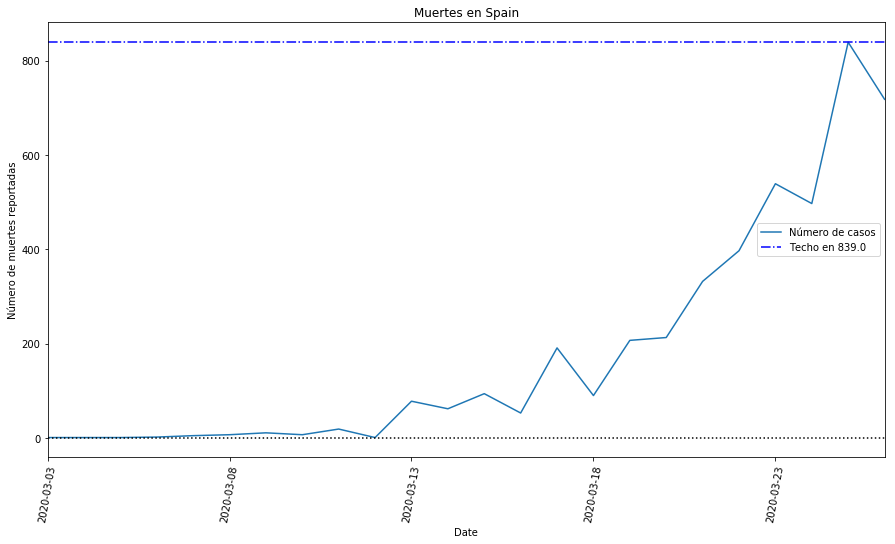

In [15]:
plot_death_changes(death_changes, 'Spain', language='es')

Primer caso en Italy detectado el 2020-01-31. Han pasado 55 días desde entonces
Actualmente hay 80,589 casos confirmados
Máximo número de nuevos casos: 6,557.0


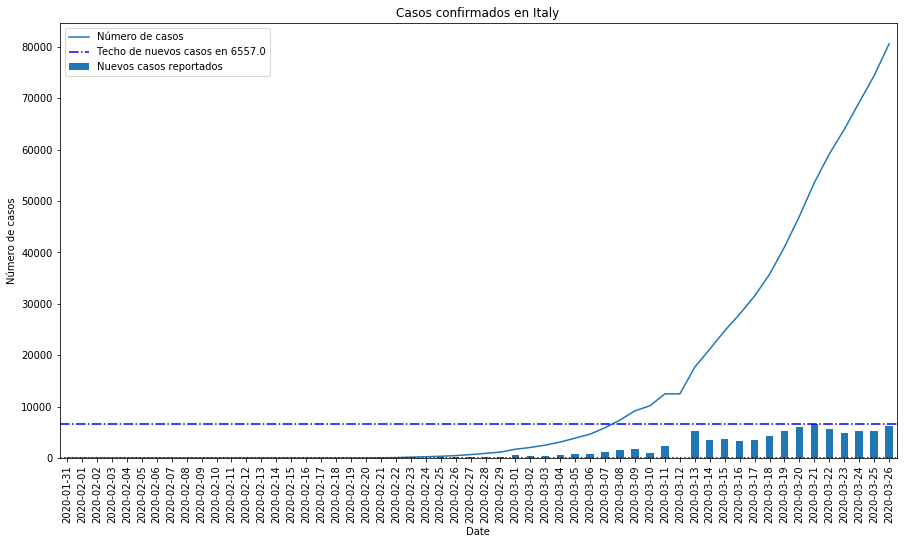

In [19]:
plot_country_cases(data, 'Italy', changes=changes, language='es')